In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('churn.csv')

In [3]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
dataset.drop(columns=['RowNumber','CustomerId', 'Surname','Geography','Gender'],inplace=True)

In [5]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [6]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [10]:
# input_data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=10)

In [13]:
input_data.shape

(10000, 8)

In [14]:
import tensorflow

In [15]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import L2
from keras.models import Sequential

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
ann = Sequential()

In [18]:
ann.add(Dense(6,input_dim=8,activation='relu',kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(5,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(4,activation='relu',kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(3,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(2,activation='relu',kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(1,activation='sigmoid'))

C:\Users\Abhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
ann.fit(x_train,y_train,batch_size=100,epochs=40,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7907 - loss: 0.8628 - val_accuracy: 0.7890 - val_loss: 0.7608
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7936 - loss: 0.7349 - val_accuracy: 0.7890 - val_loss: 0.6750
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 0.6555 - val_accuracy: 0.7890 - val_loss: 0.6274
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.6166 - val_accuracy: 0.7890 - val_loss: 0.5934
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 0.5823 - val_accuracy: 0.7890 - val_loss: 0.5676
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.5472 - val_accuracy: 0.7890 - val_loss: 0.5480
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7930 - loss: 0.5395 - val_accuracy: 0.7890 - val_loss: 0.5333
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.5110 - val_accuracy: 0.7890 - val_loss

In [21]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy= ann.history.history["val_accuracy"]

In [22]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [23]:

import matplotlib.pyplot as plt

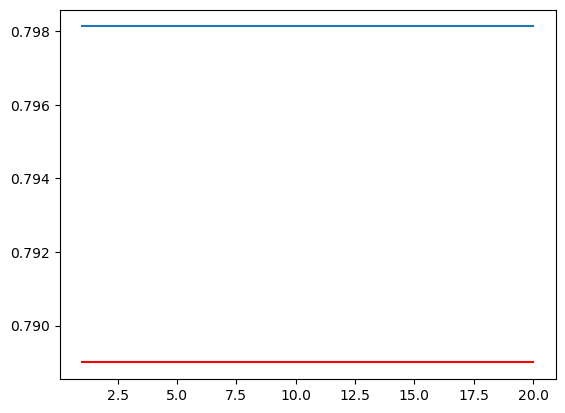

In [25]:
plt.plot([i for i in range(1,21)],train_accuracy)
plt.plot([i for i in range(1,21)],test_accuracy,c='red')
plt.show()

In [26]:
len(test_accuracy)

20

In [27]:
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [28]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
# prd_data

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,prd_data)*100

78.9

In [32]:
accuracy_score(y_train,prd_data1)*100

79.8125